HOUSING PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA CLEANING

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


DATA SPILITING

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1217,-120.90,38.20,16.0,3120.0,641.0,1319.0,526.0,2.0472,INLAND,93200.0
9359,-122.52,37.95,33.0,4448.0,631.0,1675.0,628.0,7.8904,NEAR BAY,468800.0
19513,-121.03,37.62,43.0,1241.0,240.0,612.0,266.0,2.8194,INLAND,81300.0
15602,-116.76,32.84,16.0,3311.0,702.0,1627.0,624.0,3.1196,<1H OCEAN,187200.0
2126,-119.71,36.77,11.0,5112.0,1384.0,2487.0,1243.0,2.1461,INLAND,75900.0
...,...,...,...,...,...,...,...,...,...,...
5894,-118.32,34.16,49.0,1074.0,170.0,403.0,208.0,6.2547,<1H OCEAN,366700.0
12131,-117.22,33.93,14.0,5104.0,1026.0,3513.0,972.0,3.2148,INLAND,117000.0
12786,-121.44,38.63,33.0,1077.0,271.0,753.0,236.0,1.3462,INLAND,55900.0
16479,-121.22,38.16,24.0,4411.0,776.0,2038.0,732.0,3.4750,INLAND,151200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

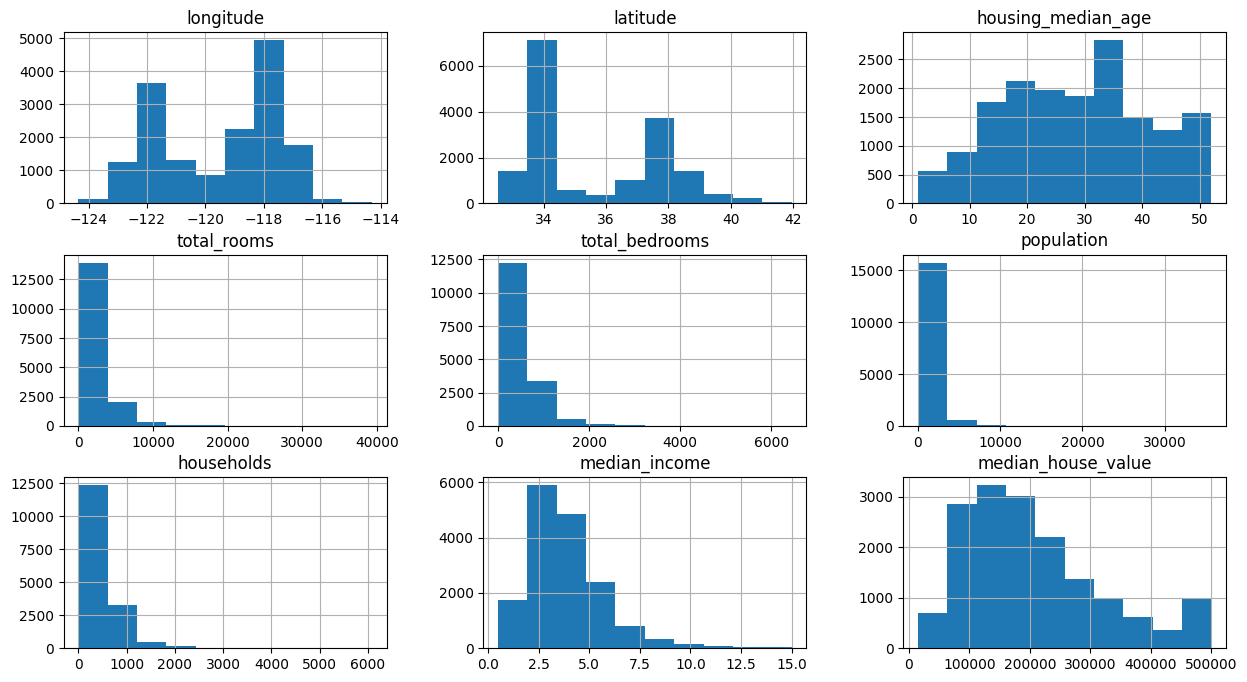

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

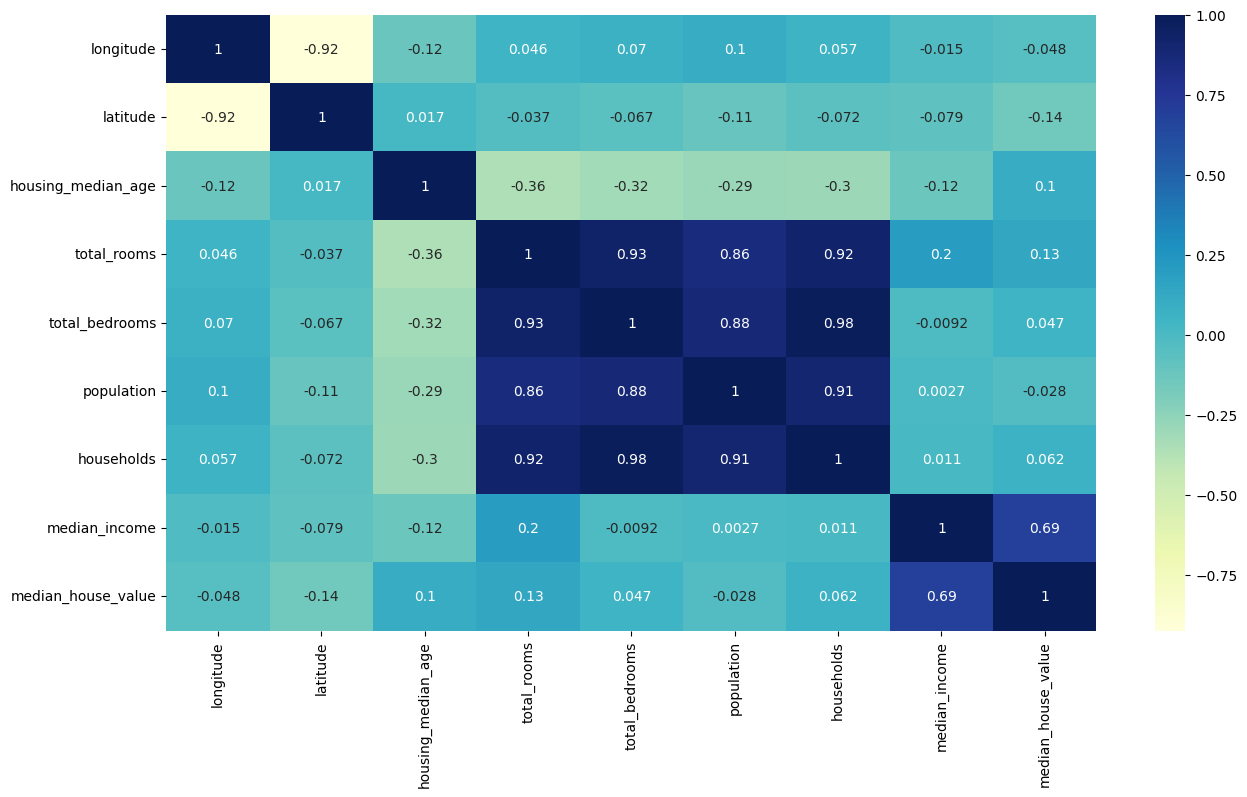

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

DATA PREPROCESSING

In [13]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']= np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

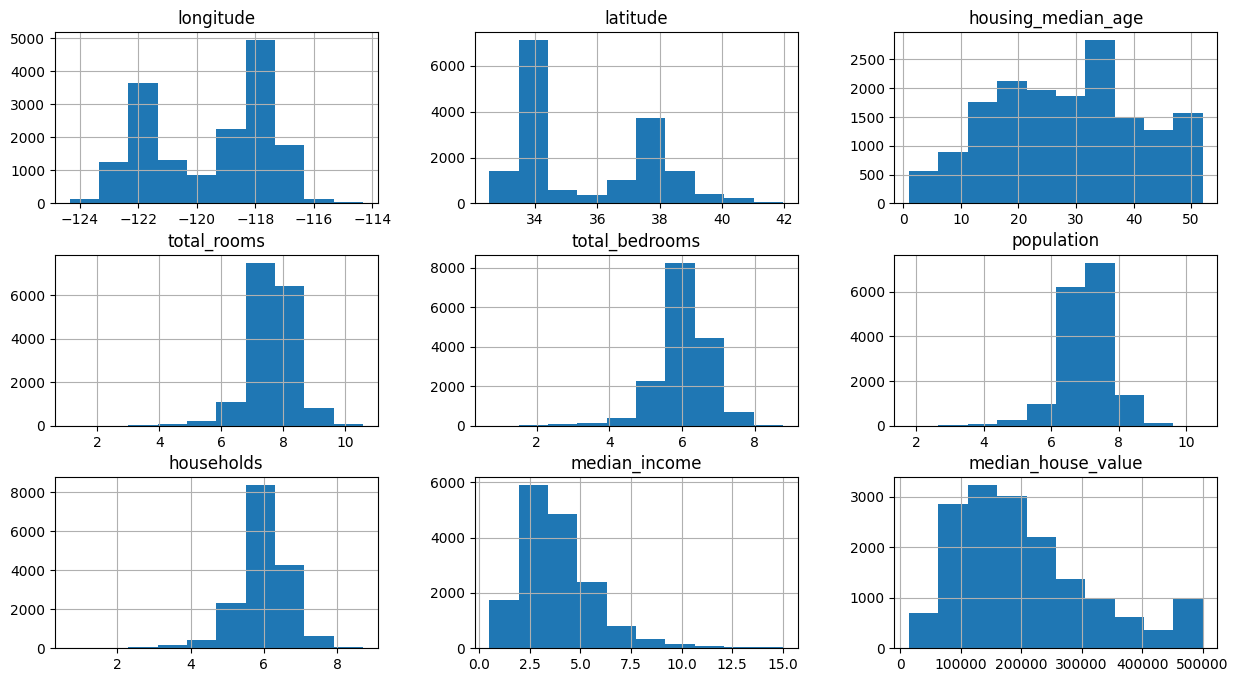

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7193
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1823
ISLAND           4
Name: count, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

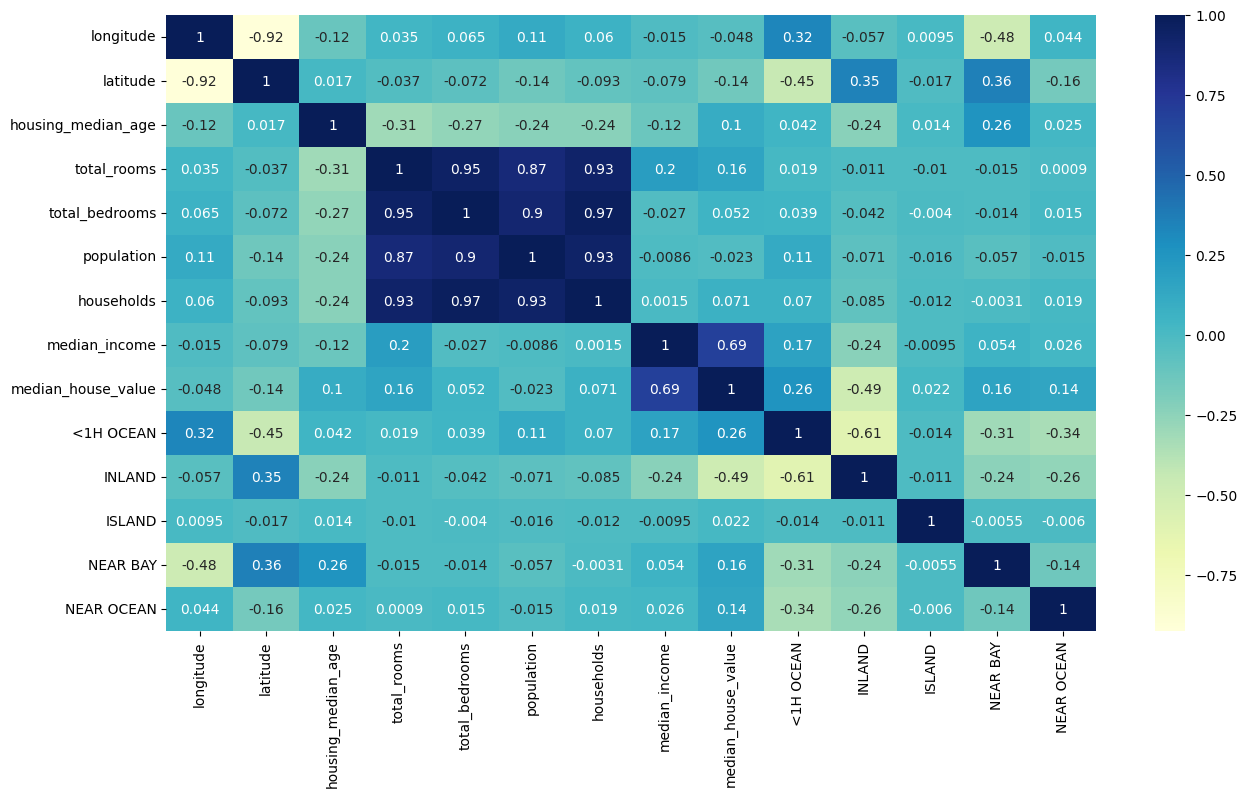

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

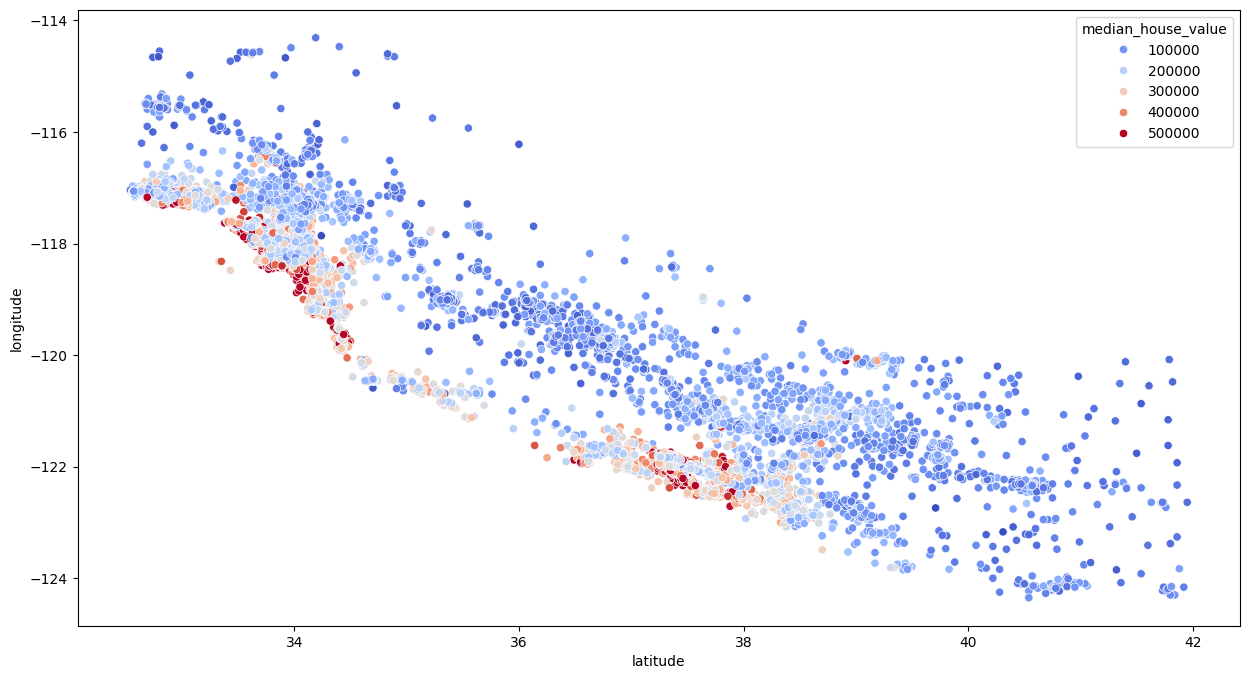

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data , hue="median_house_value", palette="coolwarm")

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_bedrooms']/train_data['households']

<Axes: >

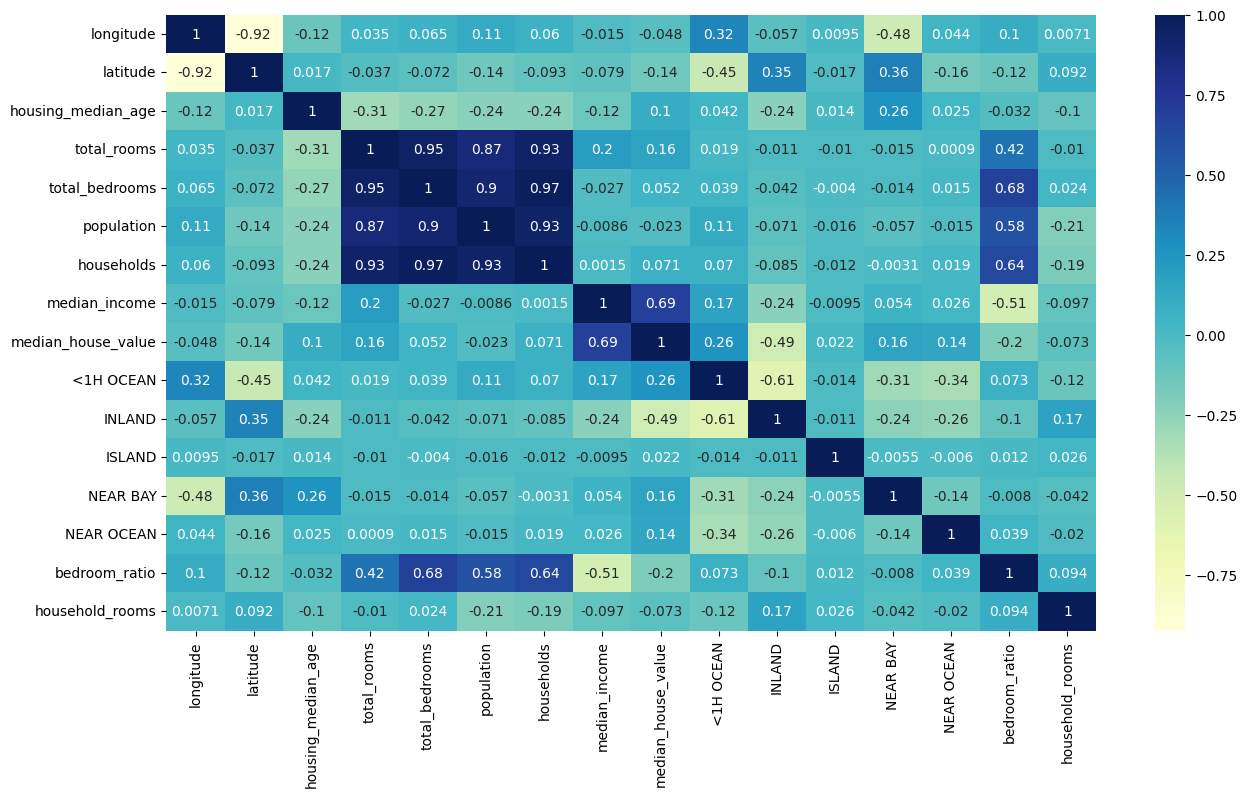

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

TRANING MODEL

LINEAR REGRESSION

In [21]:
test_data = X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']= np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_bedrooms']/test_data['households']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train , y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [23]:
X_test , y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [24]:
X_test_s = scaler.transform(X_test)

In [25]:
reg.score(X_test_s,y_test)

0.6752023359004902

RANDOM FOREST REGRESSION

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
forest.score(X_test,y_test)

0.8189537671961798

DONE THE PROJECT . JUST USING GridSearchCV to see if i can get better result IT MAY TAKE TIME TO work so we can skip it .....

GRID SEARCH CROSS VALIDATION

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train,y_train)

In [ ]:
grid_serach.best_estimator_

In [ ]:
best_forest.score(X_test,y_test)

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)